In [ ]:
# Load .m4a
import matplotlib.pyplot as plt
import librosa.display
from pydub import AudioSegment
import os
import numpy as np
import torchaudio

# print(os.getcwd())
filename = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring\1631119510605_NA\1631119510605_48.m4a'
filename = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring\1620144382079_ASUS_I002D\1620144382079_ASUS_I002D_80.m4a'
filename = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring\1620055140118_ASUS_I002D\1620055140118_ASUS_I002D_94.m4a'
x = AudioSegment.from_file(filename, format='m4a').get_array_of_samples()
x = np.float32(np.array(x))
print(len(x))
# x = x[6000000:]
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, 44100)

def audio_thresholding(x):
    x = np.abs(x)
    sr = 44100
    sec = 1
    count_range = sr*sec
    amp_th = 20
    whether_snore = []
    time_th = 1
    for t in range(0, len(x)-count_range, count_range):
        print(np.mean(x[t:t+count_range]))
        if np.mean(x[t:t+count_range]) > amp_th:
            whether_snore.append(1)
        else:
            whether_snore.append(0)
    for idx, s in enumerate(whether_snore):
        start = 0 if idx-time_th < 0 else idx - time_th
        end =  len(whether_snore)-1 if idx+time_th > len(whether_snore)-1 else idx + time_th
        if np.mean(whether_snore[start:end]) > 0.5:
            whether_snore[idx] = 1

    final = np.mean(x[x>100])*np.array(whether_snore)
    print(final.shape)
    plt.plot(final)
    plt.show()
    print(np.mean(x[x>100]))
    plt.figure()
    plt.plot(500*np.array(whether_snore))
    plt.show()

if __name__ == '__main__':
    audio_thresholding(x)



In [ ]:
import yaml
def _load_config_yaml(config_file):
    return yaml.safe_load(open(config_file, 'r'))


if __name__ == '__main__':
    config_path = rf''
    _load_config_yaml(config_path)

C:\Users\test\Downloads\snoring_test\1\1598482996718_69.m4a
Shape: (1, 513, 11265)
Dtype: torch.float32
 - Max:     18231830528.000
 - Min:      0.000
 - Mean:    3982210.250
 - Std Dev: 57250048.000

tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.2404e+00,
          4.0482e+05, 2.0249e+07],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.8114e+06,
          1.3492e+06, 1.5258e+07],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 5.9966e+07,
          1.3034e+07, 1.3294e+07],
         ...,
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.4176e+03,
          1.2716e+03, 2.0690e+04],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.7776e+02,
          5.9585e+01, 1.5460e+04],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 9.4255e+00,
          3.4479e-01, 1.6574e+04]]])



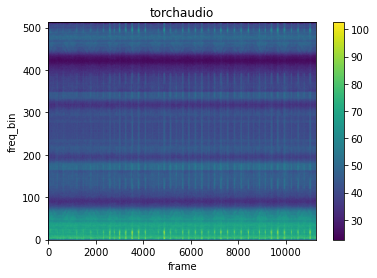

In [135]:
# Show data in Mel-Spectrogram
import torch
import torchaudio.transforms as T
import torchaudio
import matplotlib.pyplot as plt
import numpy as np
import librosa.display


def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.show(block=False)

def plot_mel_fbank(fbank, title=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Filter bank')
  axs.imshow(fbank, aspect='auto')
  axs.set_ylabel('frequency bin')
  axs.set_xlabel('mel bin')
  plt.show(block=False)

def show_fbank(filename, sample_rate, savefig=False):
    print(filename)
    # waveform, sample_rate = torchaudio.load(filename)
    waveform = AudioSegment.from_file(filename, format='m4a').get_array_of_samples()
    waveform = np.float32(np.array(waveform))
    waveform = waveform[sample_rate*60:sample_rate*62]
    waveform = np.expand_dims(waveform, 0)
    waveform = torch.from_numpy(waveform)
    # print(waveform.size())
    # librosa.display.waveplot(waveform.numpy()[0], sample_rate)
    # spectrogram = torchaudio.transforms.MelSpectrogram()
    # spec = spectrogram(waveform)
    # torchaudio.transforms.MFCC()
    # fbank = torchaudio.compliance.kaldi.fbank(waveform, htk_compat=True, sample_frequency=sample_rate, use_energy=False,
    #                                           window_type='hanning', num_mel_bins=128, dither=0.0, frame_shift=10)
    fbank = torchaudio.transforms.MelSpectrogram(sample_rate, n_fft=1024, n_mels=128)(waveform)
    plt.figure(figsize=(6, 6))
    plt.imshow(fbank[0], cmap='hot')
    if savefig:
        plt.savefig(os.path.basename(filename).replace('.wav', '_fbank.png'))
    plt.show()


    waveform, sample_rate = get_speech_sample()


def print_stats(waveform, sample_rate=None, src=None):
    if src:
        print("-" * 10)
        print("Source:", src)
        print("-" * 10)
    if sample_rate:
        print("Sample Rate:", sample_rate)
    print("Shape:", tuple(waveform.shape))
    print("Dtype:", waveform.dtype)
    print(f" - Max:     {waveform.max().item():6.3f}")
    print(f" - Min:     {waveform.min().item():6.3f}")
    print(f" - Mean:    {waveform.mean().item():6.3f}")
    print(f" - Std Dev: {waveform.std().item():6.3f}")
    print()
    print(waveform)
    print()
    

def main(filename):
    print(filename)
    # waveform, sample_rate = torchaudio.load(filename)
    waveform = AudioSegment.from_file(filename, format='m4a').get_array_of_samples()
    waveform = np.float32(np.array(waveform))
    # waveform = waveform[sample_rate*60:sample_rate*65]
    waveform = np.expand_dims(waveform, 0)
    waveform = torch.from_numpy(waveform)

    n_fft = 1024
    win_length = None
    hop_length = 512

    # define transformation
    spectrogram = T.Spectrogram(
        n_fft=n_fft,
        win_length=win_length,
        hop_length=hop_length,
        center=True,
        pad_mode="reflect",
        power=2.0,
    )
    # Perform transformation
    spec = spectrogram(waveform)

    print_stats(spec)
    plot_spectrogram(spec[0], title='torchaudio')


if __name__ == '__main__':
    filename = rf'C:\Users\test\Desktop\Leon\Datasets\Snoring_Detection\Snoring Dataset\1\1_8.wav'
    filename = rf'C:\Users\test\Downloads\snoring_test\0\1598482996718_143.m4a'
    # filename = rf'C:\Users\test\Downloads\snoring_test\0\1606921286802_sargo_1.m4a'
    filename = rf'C:\Users\test\Downloads\snoring_test\1\1598482996718_69.m4a'
    # filename = rf'C:\Users\test\Downloads\snoring_test\1\1620055140118_ASUS_I002D_13.m4a'
    sample_rate = 44100
    # show_fbank(filename, sample_rate)
    main(filename)

1598482996718_71.m4a
1598482996718_72.m4a
1598482996718_73.m4a
1598482996718_74.m4a
1598482996718_75.m4a
1620055140118_ASUS_I002D_94.m4a
1620055140118_ASUS_I002D_95.m4a


KeyboardInterrupt: 

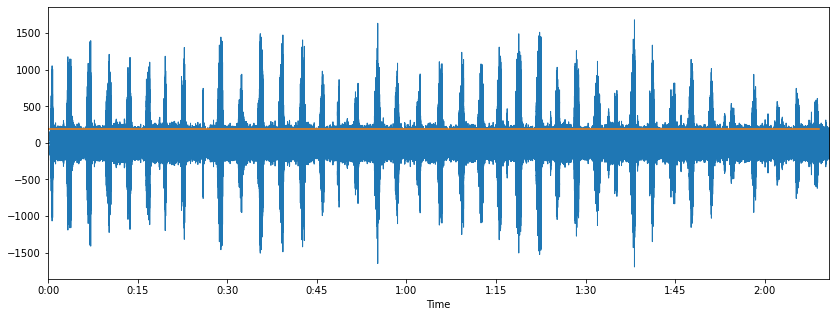

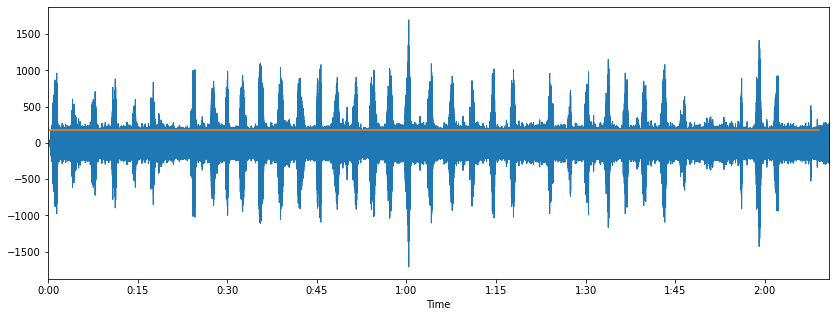

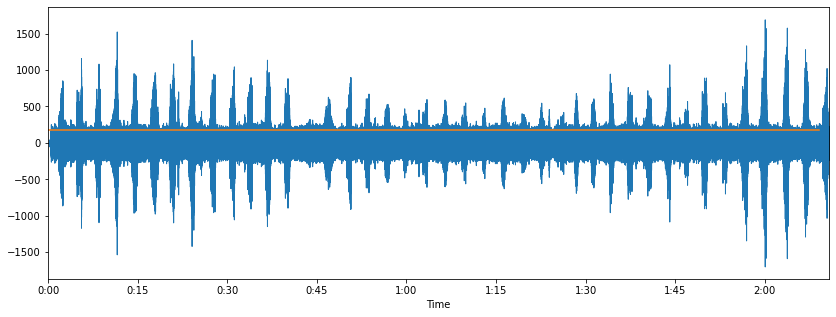

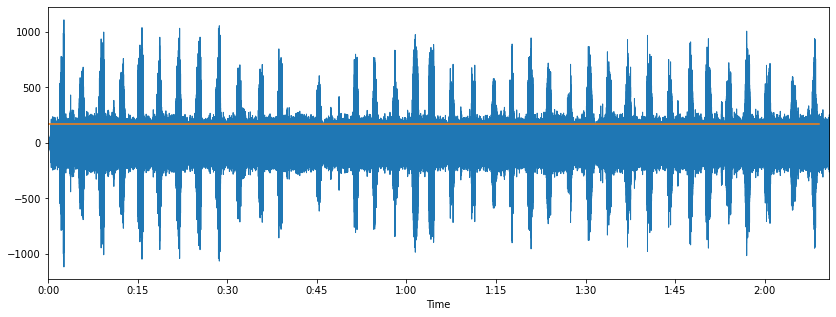

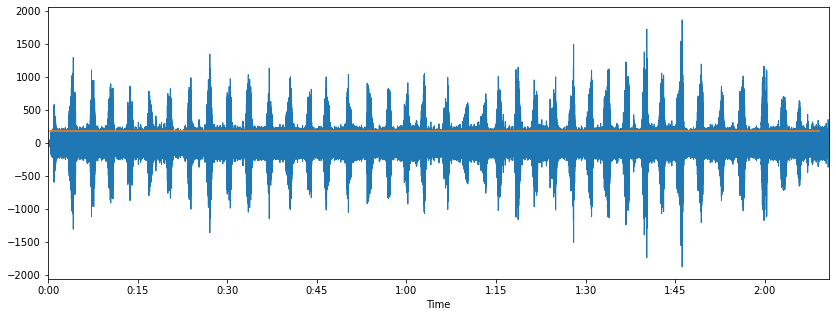

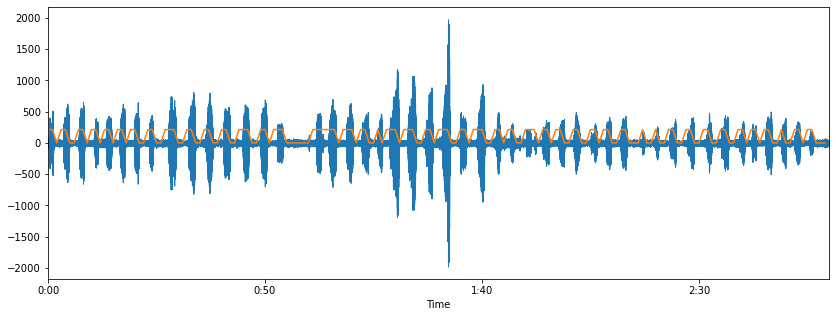

In [74]:
# Load .m4a
import matplotlib.pyplot as plt
import librosa.display
from pydub import AudioSegment
import os
import numpy as np
import torchaudio


def audio_thresholding(x):
    x = np.abs(x)
    sr = 44100
    sec = 1
    count_range = sr*sec
    amp_th = 20
    whether_snore = []
    time_th = 1
    for t in range(0, len(x)-count_range, count_range):
        if np.mean(x[t:t+count_range]) > amp_th:
            whether_snore.append(1)
        else:
            whether_snore.append(0)
    for idx, s in enumerate(whether_snore):
        start = 0 if idx-time_th < 0 else idx - time_th
        end =  len(whether_snore)-1 if idx+time_th > len(whether_snore)-1 else idx + time_th
        if np.mean(whether_snore[start:end]) > 0.5:
            whether_snore[idx] = 1

    final = np.mean(x[x>100])*np.array(whether_snore)
    plt.plot(final)
    plt.savefig(f.replace('m4a', 'png'))

if __name__ == '__main__':
    filename = rf'C:\Users\test\Downloads\0916\test'
    os.chdir(filename)
    for f in os.listdir(filename):
        print(f)
        x = AudioSegment.from_file(f, format='m4a').get_array_of_samples()
        x = np.float32(np.array(x))
        plt.figure(figsize=(14, 5))
        librosa.display.waveplot(x, 44100)

        audio_thresholding(x)
    




In [3]:
# Show data in MFCC
import torchaudio
import matplotlib.pyplot as plt
import numpy as np

def show_fbank(filename, savefig=False):
    print(filename)
    waveform, sample_rate = torchaudio.load(filename)
    # spectrogram = torchaudio.transforms.MelSpectrogram()
    # spec = spectrogram(waveform)
    # torchaudio.transforms.MFCC()
    fbank = torchaudio.compliance.kaldi.fbank(waveform, htk_compat=True, sample_frequency=sample_rate, use_energy=False,
                                            window_type='hanning', num_mel_bins=128, dither=0.0, frame_shift=10)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(fbank)
    if savefig:
        plt.savefig(os.path.basename(filename).replace('.wav', '_fbank.png'))
    plt.show()

if __name__ == '__main__':
    filename = rf'C:\Users\test\Desktop\Leon\Datasets\Snoring_Detection\Snoring Dataset\0\0_6.wav'
    show_fbank(filename)

[98 43  1  5 75 93 22 78 90 35]


7939072 180.02430839002267
File duration(s):  0:06:00.048617
peaks [  26760   26818  229025  442958  652445  766010  907388 1118904 1321659
 1560428 1734783 1882563 1883176 2117640 2349927 2521579 2733948 2956842
 3173899 3385603 3589561 3802445 4001477 4207952 4407362 4587080 4802166
 4916712 5038607 5260948 5470072 5658091 5850963 6051625 6297303 6476463
 6733439 6958135 7137212 7354375 7554482 7795805 7939019]
time [   310.6829932     311.35637188   2658.97505669   5142.7323356
   7574.87165533   8893.35873016  10534.75410431  12990.45006803
  15344.43102041  18116.53369615  20140.79129252  21856.5137415
  21863.6306576   24585.75238095  27282.59918367  29275.47501134
  31741.07428571  34328.86857143  36848.8954195   39306.77405896
  41674.72181406  44146.30022676  46457.05723356 -48537.32136054
 -46222.17578231 -44135.65387755 -41638.51029478 -40308.6338322
 -38893.43564626 -36312.061678   -33884.13678005 -31701.24045351
 -29462.00090703 -27132.31963719 -24280.00362812 -22199.96009

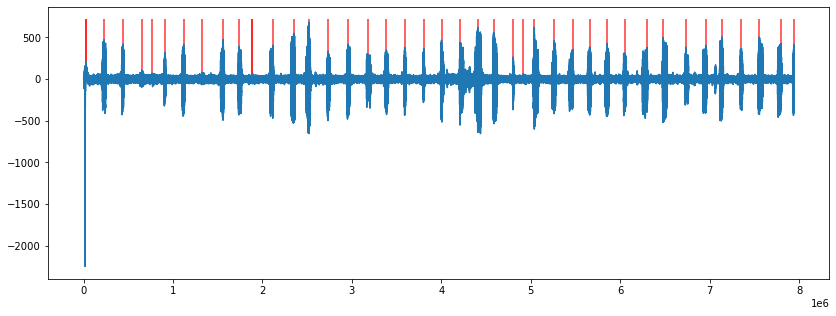

In [136]:
# Detect audio peaks with Librosa (https://librosa.github.io/librosa/)

# imports
from __future__ import print_function
import librosa
import numpy as np
import datetime
from pydub import AudioSegment

def pick_peak(filename, hop_length, pre_max, post_max, pre_avg, post_avg, delta, wait):
    # Load local audio file
    
    if filename.endswith('wav'):
        y, sr = librosa.load(filename)
    elif filename.endswith('m4a'):
        y = AudioSegment.from_file(filename, format='m4a').get_array_of_samples()
        y = np.float32(np.array(y))
        sr = 44100
    print(len(y), len(y)/sr)
    # Get file duration in seconds
    duration = librosa.get_duration(y)

    # Print duration to console
    print("File duration(s): ", str(datetime.timedelta(seconds=duration)))

    # Find peaks
    onset_env = librosa.onset.onset_strength(y=y, sr=sr,
                                             hop_length=hop_length,
                                             aggregate=np.median)
    # print(onset_env)

    peaks = librosa.util.peak_pick(y, pre_max, post_max, pre_avg, post_avg, delta, wait)
    # peaks = librosa.util.peak_pick(onset_env, pre_max, post_max, pre_avg, post_avg, delta, wait)
    # peaks = librosa.util.peak_pick(onset_env, 3, 3, 3, 5, 0.5, 10)

    # Print peaks list to console
    # print('Peaks detected at: ', librosa.frames_to_time(peaks, sr=sr))

    # Create CSV output
    peak_times = librosa.frames_to_time(peaks, sr=sr)
    print('peaks', peaks)
    print('time', peak_times)

    # librosa.output.times_csv('./output/peak_times.csv', peak_times)

    # # Complete message
    # print("Peak times output to ./output/peak_times.csv. \n Process complete.")

    # import matplotlib.pyplot as plt
    # times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
    # fig, ax = plt.subplots(nrows=2, sharex=True)
    # D = np.abs(librosa.stft(y))
    # librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
    #                         y_axis='log', x_axis='time', ax=ax[1])
    # ax[0].plot(times, onset_env, alpha=0.8, label='Onset strength')
    # ax[0].vlines(times[peaks], 0,
    #             onset_env.max(), color='r', alpha=0.8,
    #             label='Selected peaks')
    # ax[0].legend(frameon=True, framealpha=0.8)
    # ax[0].label_outer()

    import matplotlib.pyplot as plt
    times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
    plt.figure(figsize=(14, 5))
    plt.plot(y, label='y')
    # librosa.display.waveplot(y, sr=sr)
    # plt.plot(peaks, np.max(y)*np.ones_like(peaks))
    plt.vlines(peaks, 0,
               y.max()*1.05, color='r', alpha=0.8,
               label='Selected peaks')
    plt.show()
    # fig, ax = plt.subplots()
    # D = np.abs(librosa.stft(y))
    # # ax.plot(times, onset_env, alpha=0.8, label='Onset strength')
    # ax.plot(y, label='y')


if __name__ == '__main__':
    filename = rf'C:\Users\test\Desktop\Leon\Datasets\Snoring_Detection\Snoring Dataset\1\1_460.wav'
    # filename = rf'C:\Users\test\Desktop\Leon\Datasets\Snoring_Detection\Snoring Dataset\0\0_90.wav'
    # filename = rf'C:\Users\test\Desktop\Leon\Datasets\Snoring_Detection\Snoring Dataset\0\0_100.wav'
    filename = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring\1620144382079_ASUS_I002D\1620144382079_ASUS_I002D_39.m4a'
    filename = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring\1620144382079_ASUS_I002D\1620144382079_ASUS_I002D_31.m4a'
    # filename = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring\1620144382079_ASUS_I002D\1620144382079_ASUS_I002D_1.m4a'
    # for i in range(1, 4):
    #     for j in range(1, 4):
    #         for k in range(1, 4):
    #             for l in range(1, 6):
    hop_length = 1024
    pick_peak(filename, hop_length, 1e5, 1e5, 3, 5, delta=0.5, wait=10)

In [137]:
# Detect audio peaks with Librosa (https://librosa.github.io/librosa/)

# imports
from __future__ import print_function
import librosa
import librosa.display
import numpy as np
import datetime
import csv
from pydub import AudioSegment


def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []

    for i in range(0, len(signal), hop_length):
        # x = max(i-frame_size, 0)
        current_frame_amplitude_envelope = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_envelope)
    return np.array(amplitude_envelope)
    # return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])


def get_audio_waveform(filename):
    if filename.endswith('wav'):
        y, sr = librosa.load(filename)
    elif filename.endswith('m4a'):
        y = AudioSegment.from_file(filename, format='m4a').get_array_of_samples()
        y = np.float32(np.array(y))
        sr = 44100
    return y, sr

    
def envelope_plot(signal, frame_size, hop_length):
    # frame_size=10240
    # hop_length=5120
    ae = amplitude_envelope(signal, frame_size, hop_length)
    # frames = range(0, ae.size)
    # t = librosa.frames_to_time(frames, hop_length)
    # print(t)
    # print(ae)
    # print(np.mean(ae))
    # print(len(ae))
    # plt.plot(t, ae, label='envelope', color='g')
    return ae

    
def save_in_csv(filename, data, save_path):
    with open(os.path.join(save_path, f'{filename}_peak.csv'), 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([filename])
        writer.writerow(['peak time'])
        if len(data) > 0:
            writer.writerow([f'start time: {data[0]//60:02d}:{data[0]%60:02d}', f'end time: {data[-1]//60:02d}:{data[-1]%60:02d}'])
        else:
            writer.writerow([f'start time: 00:00', f'end time: 00:00'])

        writer.writerow(['time', 'second'])
        for s in data:
            writer.writerow([f'{s//60:02d}:{s%60:02d}', s])


def save_in_csv_single_row(filename, data, save_path):
    # data_time = [f'{s//60:02d}:{s%60:02d}' for s in data]
    with open(os.path.join(save_path, 'total_peak.csv'), 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([filename, len(data)])


def pick_peak(y, filename, hop_length, pre_max, post_max, pre_avg, post_avg, delta, wait, save_path=None):
    # Load local audio file
    
    # if filename.endswith('wav'):
    #     y, sr = librosa.load(filename)
    # elif filename.endswith('m4a'):
    #     y = AudioSegment.from_file(filename, format='m4a').get_array_of_samples()
    #     y = np.float32(np.array(y))
    #     sr = 44100
    # print(len(y), len(y)/sr)
    # Get file duration in seconds
    # duration = librosa.get_duration(y)

    # Print duration to console
    # print("File duration(s): ", str(datetime.timedelta(seconds=duration)))


    peaks = librosa.util.peak_pick(y, pre_max, post_max, pre_avg, post_avg, delta, wait)
    peak_times = np.array(peaks) / sr
    # print(peak_times)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(14, 5))
    # plt.plot(np.arange(y)/sr, y, label='y')
    plt.vlines(peaks/sr, 0,
               y.max()*1.05, color='r', alpha=0.6,
               label='Selected peaks')
    librosa.display.waveplot(y, sr)
    filename = os.path.basename(filename).split('.')[0]
    if save_path is not None:
        plt.savefig(os.path.join(save_path, f'{filename}_peak.png'))
    else:
        plt.show()
    plt.close()
    return peak_times


if __name__ == '__main__':
    # filename = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring\1620144382079_ASUS_I002D\1620144382079_ASUS_I002D_39.m4a'
    # filename = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring\1620144382079_ASUS_I002D\1620144382079_ASUS_I002D_31.m4a'
    # filename = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring\1620144382079_ASUS_I002D\1620144382079_ASUS_I002D_1.m4a'

    data_path = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring'
    save_path = rf'C:\Users\test\Desktop\Leon\Projects\Snoring_Detection\infos\peak2'
    hop_length = 5120
    frame_size = 10240

    effective = []
    for f in os.listdir(data_path):
        if os.path.isdir(os.path.join(data_path, f)):
            if len(os.listdir(os.path.join(data_path, f)))>82:
                effective.append(f)
    # print(effective, len(effective))
    for idx, _dir in enumerate(effective[24:]):
        data_p = os.path.join(data_path, _dir)
        save_p = os.path.join(save_path, _dir)
        os.chdir(data_p)
        if not os.path.exists(save_p):
            os.mkdir(save_p)
        file_list = os.listdir(data_p)
        file_list.sort(key=len)

        with open(os.path.join(save_path, 'total_peak.csv'), 'a', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow([])
            writer.writerow([_dir, f'[{idx+25}] / [{len(effective)}]'])

        peak_count = []
        for f in file_list:
            if f.endswith('m4a'):
                print(f)
                y, sr = get_audio_waveform(f)
                ae = envelope_plot(y, frame_size, hop_length)
                
                # TODO: check is it work?
                y = y * np.abs(y) / 2
                
                peak_times = pick_peak(y, f, hop_length, 1e5, 1e5, 1e3, 1e3, delta=2*np.mean(ae), wait=10, save_path=save_p)
                # peak_times = pick_peak(y, f, hop_length, 1e5, 1e5, 3, 5, delta=0.5, wait=10, save_path=save_p)
                peak_times = np.unique(np.int32(peak_times))
                print(peak_times)
                save_in_csv(f.split('.')[0], peak_times, save_path=save_p)
                save_in_csv_single_row(f.split('.')[0], peak_times, save_path=save_path)
                peak_count.append(len(peak_times))

        with open(os.path.join(save_path, 'total_peak.csv'), 'a', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['average', np.mean(np.array(peak_count))])

1631208670684_1.m4a
[  2   5   8  16 118]
1631208670684_2.m4a
[67]
1631208670684_3.m4a


KeyboardInterrupt: 

In [63]:
# Frequency analysis
from __future__ import print_function
import librosa
import librosa.display
import numpy as np
import datetime
import csv
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp


def get_audio_waveform(filename):
    if filename.endswith('wav'):
        y, sr = librosa.load(filename)
    elif filename.endswith('m4a'):
        y = AudioSegment.from_file(filename, format='m4a')
        sr = y.frame_rate
    return y, sr


def get_frquency(signal, sr, n_fft):
    # short time fourier transform
    # (n_fft and hop length determine frequency/time resolution)
    S = librosa.stft(signal, n_fft=n_fft, hop_length=n_fft//2)
    # print(S.shape)
    # convert to db
    # (for your CNN you might want to skip this and rather ensure zero mean and unit variance)
    cent = librosa.feature.spectral_centroid(y=signal, sr=sr)
    # return librosa.amplitude_to_db(np.abs(S), ref=np.max)

    return cent[0]
    # return S

def get_audio_clip(signal, time_interval, sample_rate):
    signal_interval = [int(time_interval[0]*sample_rate), int(time_interval[1]*sample_rate)]
    return signal[signal_interval[0]:signal_interval[1]]


def convert_and_plot_frequency(signal, sr, time_interval, n_fft, save_path):
    # Get audio clip
    clip = get_audio_clip(signal, time_interval, sr)

    # Process
    # print(clip.shape)
    # clip = clip[list(range(0, len(clip), 20))]
    # print(clip.shape)
    # clip[np.abs(clip)<50] = 0

    # Convert to frquency domain
    f = get_frquency(clip, sr, n_fft)
    # print(f)
    
    # # average over file
    # D_AVG = np.mean(f, axis=1)
    # plt.bar(np.arange(D_AVG.shape[0]), D_AVG)
    # x_ticks_positions = [n for n in range(0, n_fft // 2, n_fft // 16)]
    # x_ticks_labels = [str(int(sr / 2048 * n)) + 'Hz' for n in x_ticks_positions]
    # print(x_ticks_positions)
    # print(x_ticks_labels)
    # plt.xticks(x_ticks_positions, x_ticks_labels)
    # plt.xlabel('Frequency')
    # plt.ylabel('dB')
    # plt.show()

    # # plot
    # plt.figure(figsize=(6,6))
    print(signal.shape, clip.shape)
    fig, ax = plt.subplots(2,1)
    ax[0].plot(f)
    ax[0].set_xlabel('sample')
    ax[0].set_ylabel('frequency')
    ax[1].plot(clip)
    # fig.show()
    plt.savefig(save_path)


def frequency_analysis():
    n_fft = 2048
    time_range = 1
    filename = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring\1620055140118_ASUS_I002D\1620055140118_ASUS_I002D_12.m4a'
    filename = rf'C:\Users\test\Downloads\1007\env_sounds\alarm\1630345236867_100.m4a'
    save_path = rf'C:\Users\test\Downloads\1007\env_sounds\alarm'
    # time_interval = [56, 57]
    # time_interval = [62, 63]
    # time_interval = [56, 63]

    # Load audio
    signal, sr = get_audio_waveform(filename)
    print(sr)
    sr = 44100

    for i in range(0, 180, time_range):
        print(i+1)
        name = os.path.basename(filename).split('.')[0]
        convert_and_plot_frequency(signal, sr, [i, i+time_range], n_fft, os.path.join(save_path, f'{name}_{i+1:03d}.png'))
    
    name = os.path.basename(filename).split('.')[0]
    convert_and_plot_frequency(filename, [0, 180], n_fft, os.path.join(save_path, f'{name}_full.png'))


def main():
    frequency_analysis()


if __name__ == '__main__':
    main()
    

16000
1


ParameterError: Audio data must be of type numpy.ndarray

In [5]:
import yaml
def _load_config_yaml(config_file):
    return yaml.safe_load(open(config_file, 'r'))


if __name__ == '__main__':
    config_path = rf'C:\Users\test\Desktop\Leon\Projects\Snoring_Detection\config\_cnn_valid_config.yml'
    a = _load_config_yaml(config_path)
    a['model']['name'] = 'efficient_b0'
    with open('testing.yaml', 'w', encoding='UTF-8') as yaml_file:
        yaml.safe_dump(a, yaml_file)

In [ ]:
# Statistics of peak value
from __future__ import print_function
import librosa
import librosa.display
import numpy as np
import datetime
import csv
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp


def get_histogram(data):
    pass


def plot_histogram(data):
    n, bins, patches = plt.hist(x=data, bins='auto', color='#0504aa',
    alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    # plt.text(23, 45, r'$\mu=15, b=3$')
    maxfreq = n.max()
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


def main():
    # mock_data = [{'start': 0, 'end': 175, 'peak_amount': [1,3,5,7,9,11,13,15]}]
    mock_peak_amount = [[1,1,1,3,5,5,5,5,7,7,7,7,7,9,11,13,15,15,15,15,15,15], [2,4,6,8,10], [5,5,0,0,0], [0,0,0]]
    plot_histogram(mock_peak_amount[0])


if __name__ == '__main__':
    main()

In [ ]:
# Find best peak picking parameters
from __future__ import print_function
import librosa
import librosa.display
import numpy as np
import datetime
import csv
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp


def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []

    for i in range(0, len(signal), hop_length):
        # x = max(i-frame_size, 0)
        current_frame_amplitude_envelope = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_envelope)
    return np.array(amplitude_envelope)
    # return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])


def envelope_plot(signal, frame_size, hop_length):
    # frame_size=10240
    # hop_length=5120
    ae = amplitude_envelope(signal, frame_size, hop_length)
    # frames = range(0, ae.size)
    # t = librosa.frames_to_time(frames, hop_length)
    # print(t)
    # print(ae)
    # print(np.mean(ae))
    # print(len(ae))
    # plt.plot(t, ae, label='envelope', color='g')
    return ae


def peak_plot(filename, save_path, y, sr, peaks):
    plt.figure(figsize=(14, 5))
    # plt.plot(np.arange(y)/sr, y, label='y')
    plt.vlines(peaks/sr, 0,
               y.max()*1.05, color='r', alpha=0.6,
               label='Selected peaks')
    librosa.display.waveplot(y, sr)
    filename = os.path.basename(filename).split('.')[0]
    # plt.hlines(12, 0, len(y), color='g')
    
    # analytic_signal = hilbert(y) 
    # amplitude_envelope = np.abs(analytic_signal)
    # print(amplitude_envelope)
    # plt.plot(amplitude_envelope, label='envelope')
    

    if save_path is not None:
        plt.savefig(os.path.join(save_path, f'{filename}_peak.png'))
    else:
        plt.show()
    plt.close()


def get_audio_waveform(filename):
    if filename.endswith('wav'):
        y, sr = librosa.load(filename)
    elif filename.endswith('m4a'):
        y = AudioSegment.from_file(filename, format='m4a').get_array_of_samples()
        y = np.float32(np.array(y))
        sr = 44100
    return y, sr


def find_best_peak(y, sr, save_path, pre_max, post_max, pre_avg, post_avg, delta, wait):
    peaks = librosa.util.peak_pick(y, pre_max, post_max, pre_avg, post_avg, delta, wait)
    peak_times = np.array(peaks) / sr
    return peaks


# def find_best_peak_with_mv(y, sr, save_path, pre_max, post_max, pre_avg, post_avg, delta, wait, interval):
#     # Moving average for delta
#     for i in range(0, len(y), interval):
#         peaks = librosa.util.peak_pick(y, pre_max, post_max, pre_avg, post_avg, delta, wait)
#     return peaks


def main():
    filename = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring\1620144382079_ASUS_I002D\1620144382079_ASUS_I002D_39.m4a'
    # filename = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring\1606921286802_sargo\1606921286802_sargo_15.m4a'
    save_path = rf'C:\Users\test\Desktop\Leon\Datasets\ASUS_snoring\1620144382079_ASUS_I002D\1620144382079_ASUS_I002D_39.m4a'
    pre_max = 1e5
    post_max = 1e5
    pre_avg = 1e3
    post_avg = 1e3
    delta = 80
    wait = 10
    hop_length = 5120
    frame_size = 10240
    y, sr = get_audio_waveform(filename)
    mean_amlitude = np.mean(np.abs(y))
    print('mean_amlitude', mean_amlitude)
    ae = envelope_plot(y, frame_size, hop_length)
    peaks = find_best_peak(y, sr, None, pre_max, post_max, pre_avg, post_avg, 2*np.mean(ae), wait)
    peak_plot(filename, None, y, sr, peaks)

if __name__ == '__main__':
    main()

In [ ]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
from pydub import AudioSegment
import librosa

# x = electrocardiogram()[2000:4000]
x = AudioSegment.from_file(filename, format='m4a').get_array_of_samples()
x = np.float32(np.array(x))
sr = 44100

plt.figure(figsize=(14, 5))
# librosa.display.waveplot(x, 44100)
peaks, _ = find_peaks(x, height=1000, distance=10)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [ ]:
from scipy import fft, arange
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os


def frequency_sepectrum(x, sf):
    """
    Derive frequency spectrum of a signal from time domain
    :param x: signal in the time domain
    :param sf: sampling frequency
    :returns frequencies and their content distribution
    """
    x = x - np.average(x)  # zero-centering

    n = len(x)
    print(n)
    k = arange(n)
    tarr = n / float(sf)
    frqarr = k / float(tarr)  # two sides frequency range

    frqarr = frqarr[range(n // 2)]  # one side frequency range

    x = fft(x) / n  # fft computing and normalization
    x = x[range(n // 2)]

    return frqarr, abs(x)


# Sine sample with a frequency of 1hz and add some noise
sr = 32  # sampling rate
y = np.linspace(0, 2*np.pi, sr)
y = np.tile(np.sin(y), 5)
y += np.random.normal(0, 1, y.shape)
t = np.arange(len(y)) / float(sr)

plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')

frq, X = frequency_sepectrum(y, sr)

plt.subplot(2, 1, 2)
plt.plot(frq, X, 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('|X(freq)|')
plt.tight_layout()


# # wav sample from https://freewavesamples.com/files/Alesis-Sanctuary-QCard-Crickets.wav
# here_path = os.path.dirname(os.path.realpath(__file__))
# wav_file_name = 'Alesis-Sanctuary-QCard-Crickets.wav'
# wave_file_path = os.path.join(here_path, wav_file_name)
# sr, signal = wavfile.read(wave_file_path)

# y = signal[:, 0]  # use the first channel (or take their average, alternatively)
# t = np.arange(len(y)) / float(sr)

# plt.figure()
# plt.subplot(2, 1, 1)
# plt.plot(t, y)
# plt.xlabel('t')
# plt.ylabel('y')

# frq, X = frequency_sepectrum(y, sr)

# plt.subplot(2, 1, 2)
# plt.plot(frq, X, 'b')
# plt.xlabel('Freq (Hz)')
# plt.ylabel('|X(freq)|')
# plt.tight_layout()

plt.show()

In [ ]:
# Load .wav
import matplotlib.pyplot as plt
import librosa.display

print(os.getcwd())
filename = rf'C:\Users\test\Desktop\Leon\Datasets\Snoring_Detection\Snoring Dataset\1\1_499.wav'
x , sr = librosa.load(filename)
plt.figure(figsize=(20, 6))
librosa.display.waveplot(x, sr=sr)
plt.savefig(os.path.basename(filename).replace('.wav', '_time.png'))
show_fbank(filename, savefig=True)